# Tree Based Method
## Decision Tree and Random Forest
### Decision Tree Building

[Examples and codes are from: Python Machine Learning, S. Raschka, PACKT publishing, 2016]

Import packages and read data.

In [1]:
# import packages
import numpy as np
%matplotlib inline
import pandas as pd

## load iris data from file
#Location = r'data\IrisData.csv'
#df = pd.read_csv(Location)

# load iris data by scikit-learn function 
from sklearn import datasets
iris = datasets.load_iris()

Assign feature matrix and target value
- $\mathbf{x}$: input feature (petal length and petal width)
- $y$: output label (0, 1, 2; setosa, vergicolor, verginica)

In [2]:
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
X[:5, :]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Split the dataset into separate training and test datasets.
Randomly split the $\mathbf{x}$ and $y$ arrays into
   1. 30% test data (45 samples) and  
   1. 70% training data (105 samples).

In [5]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
X_train.shape

(105, 2)

### Decision Tree
- Use entropy (deviance) as the impurity measure, $i(\mathcal{N})=-\sum_j  p_j \log_2 p_j$
- Limit the tree depth to three (to prevent overfitting).

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Decision region plotting routine

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c='',
                   alpha=1.0,
                   linewidths=1,
                   marker='o',
                   s=55, label='test set')

Fit decision tree using training set.

In [11]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Test the tree and show the plot the results.

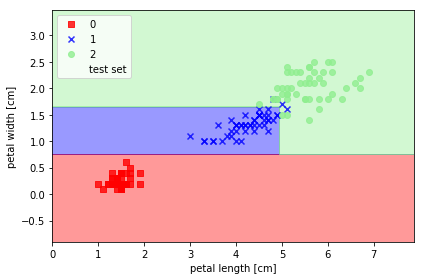

In [15]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

From the export facility of `scikit-learn`, we can visualize the decision tree.
- create the .dot file using export_graphvis function.
- then convert tree.dot file input a PNG file.

In [18]:
from sklearn.tree import export_graphviz
from subprocess import check_call

export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])
check_call(['dot','-Tpng','tree.dot','-o','tree2.png'])

OSError: [Errno 2] No such file or directory

- Using `GraphVis` software, we can convert dot file to png file.
- In this example, decision tree is saved as tree.png, as shown below.

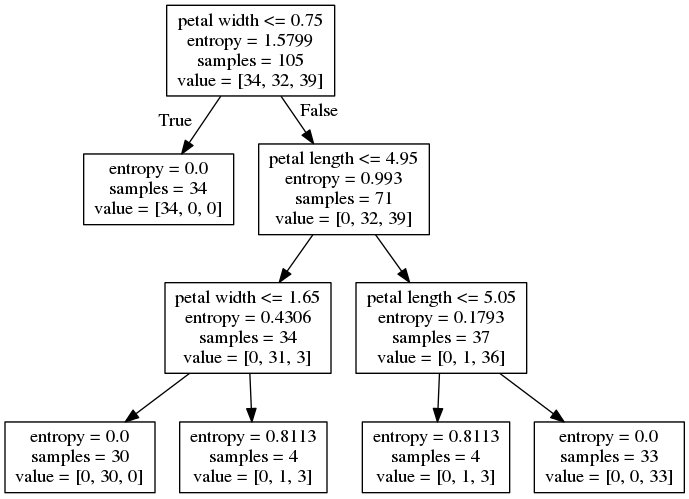

In [356]:
from IPython.display import Image
Image(filename='tree.png', width=600)

## EXERCISE 1. Parameter tuning for decision tree

예제를 확인했으니, 이를 응용해 봅시다.  
먼저 decision tree의 parameter 중 max_depth를 변화해가며 결과를 확인해 보겠습니다.  
max_depth가 1,3,10,30인 경우의 decision tree를 만들어주세요.  
(되도록 같은 코드를 여러번 작성하지 않고, `for` 등의 반복문을 이용합시다.)

In [448]:
n = (1,3,10,30)
tree_abb = {}

## TODO: max_depth가 n[i]인 분류기 tree_abb[i] 만들기

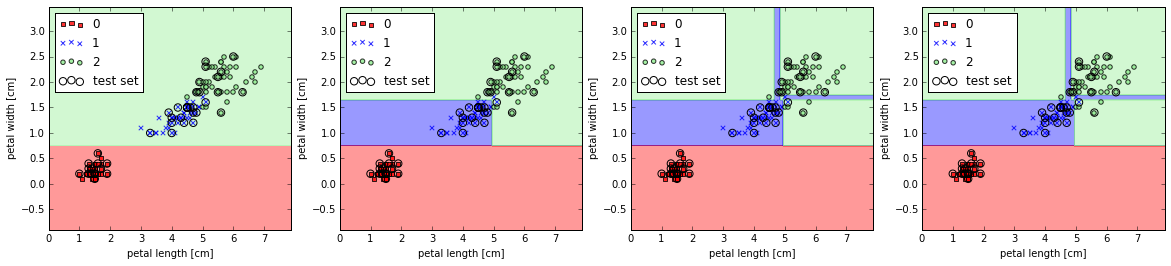

In [397]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (20,4))

## TODO: 각각의 tree_abb[i]를 시각화하는 그래프 그리기

각각의 실험 결과를 눈으로 확인했는데요, 이제 주어진 classifier에 대해 다음 세 항목을 수치로 출력해보는 함수를 작성해 봅시다.
1. training accuracy
1. test accuracy
1. 수행 속도



In [418]:
def get_stats(X_train, X_test, y_train, y_test, classifier):

    ## 수행 속도 확인하는 code 예시
    import time
    t = time.time()
    # 수행 속도를 측정할 명령어
    speed = time.time() - t
    
    ## TODO: accuracy 구하는 함수 작성하기
        
    return accuracy_train, accuracy_test, speed

In [425]:
for i in range(4):
    a_train, a_test, speed = get_stats(X_train, X_test, y_train, y_test, tree_abb[i])
    print a_train, a_test, speed

0.695238095238 0.6 0.000553131103516
0.980952380952 0.977777777778 0.000186920166016
0.990476190476 0.955555555556 0.000242948532104
0.990476190476 0.955555555556 0.000355958938599


## EXERCISE 2. Decision tree for high-dimensional data

이제, decision tree를 더 복잡한 데이터에 적용해보겠습니다.  
아래의 `digit` 데이터는 손글씨로 적은 숫자 데이터입니다. 이 데이터를 decision tree를 이용해 분류해 봅시다.

In [437]:
digits = datasets.load_digits()

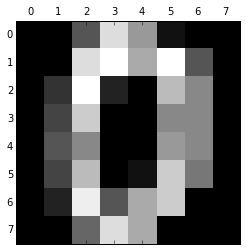

In [438]:
plt.gray() 
plt.matshow(digits.images[0]) # 0 대신 임의의 숫자를 넣어보세요.
plt.show()

In [446]:
## TODO: digits 데이터를 분류하여 training accuracy, test accuracy, 수행 속도 출력

## EXERCISE 3. Build your own decision tree algorithm

이제, library 함수 대신, decision tree를 찾는 알고리즘을 직접 작성해보겠습니다.
문제를 간단히 하기 위해, class가 2개인 2차원 데이터를 가정하고 코드를 작성합니다.
decision tree를 찾는 알고리즘의 pseudocode를 첨부해두었으니, 이를 이용해 아래 함수를 작성해주세요.

```
GrowTree(D, F) – grow a feature tree from training data.
 
Input : data D; set of features F.
Output : feature tree T with labelled leaves.

if Homogeneous(D) then return Label(D) ;
S = BestSplit(D, F) ;
split D into D1 and D2 according to the literals in S;
for each i do
    if Di not empty then Ti = GrowTree(Di, F) else Ti is a leaf labelled with Label(D);
end
return a tree whose root is labelled with S and whose children are Ti
 
 
BestSplit(D, F) – find the best split for a decision tree.
 
Input : data D; set of features F.
Output : feature f to split on.
Imin  =1;
for each f ∈ F do
    split D into subsets D1, D2 according to the values Vj of f;
    if Entropy({D1, D2}) < Imin then
        Imin = Entropy({D1,D2});
        fbest =  f;
    end
end
return fbest
```

In [445]:
class Tree(object):
    def __init__(self):
        self.leaf1 = None
        self.leaf2 = None

        self.feature = None
        self.boundary = None
        
class DecisionTree(object):
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = Tree()
        
    def fit(self, X, y):
        ## TODO: Decision tree 만드는 알고리즘 구현
        
        return self
    
    
    def predict(self, X):
        ## TODO: Decision tree를 이용해 결과를 출력하는 알고리즘 구현
        
        return z

## EXERCISE 4. Extension to Random forest

위 과정을 모두 완료했다면, random forest를 이용해 분류하는 방법을 알아보겠습니다.

### Random Forest
1. Draw a random bootstrap samples of size `n` (with replacement)
2. Grow `d` decision tree from the bootstrap sample. At each node:  
    A. Randomly select `d` features without replacement.  
    B. Split the node using the feature that provides the best split according to objective function.
3. Repeat the step 1 and 2, `k` times.
4. Aggregate the prediction, to assign the class label by majority vote.

Parameters (used in this example):
* `n_estimators`: integer, optional (default = 10)  
    The number of trees in the forest.
* `criterion`: string, (default = "gini")  
    The impurity measure.
* `random_state`: used to control the random number generator
* `n_jobs`: integer, optional (default = 1)  
    The number of jobs to run in parallel for both fit and predict.  
    If -1, then the number of jobs is set to the number of cores.

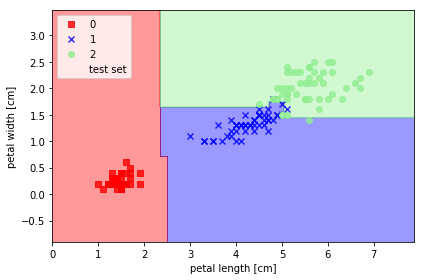

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 1, n_jobs = 2)
forest.fit (X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier = forest, test_idx = range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
# plt.savefig('./figures/random_forest.png', dpi=300)
plt.show()

In [447]:
## TODO: digits 데이터를 random forest를 이용해 분류하여 training accuracy, test accuracy, 수행 속도 출력